<a href="https://colab.research.google.com/gist/jonghank/45861bef4aafb6cd5fdf239850cc56c1/ase3001_monte-carlo-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte-Carlo methods

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

몬테칼로 방법은 랜덤한 샘플을 반복적으로 생성하여 수치 결과를 얻는 알고리듬을 의미한다.
단순 연산에 강한 컴퓨터의 특성을 활용하는 것으로, 공학/물리학/수학 문제에 널리 사용되며, 문제가 너무 복잡하거나 규모가 커서 특별히 다른 뾰족한 방법 없는 경우에 유용하게 사용할 수 있다.

## Monte-Carlo 적분

몬테칼로 방법을 활용하여 간단한 정적분을 계산해 보자. 아래의 적분을 생각해 보자.

$$
I = \int_0^{\infty} \frac{e^{-x}}{1+\left(x-1\right)^2}dx
$$

적분되는 함수를 $f(x) = \frac{e^{-x}}{1+\left(x-1\right)^2}$로 부르자. 아래의 코드를 실행시키면 함수의 그래프를 그려볼 수 있으며,
계산하려고 하는 정적분은 그래프 아래의 면적이 된다.


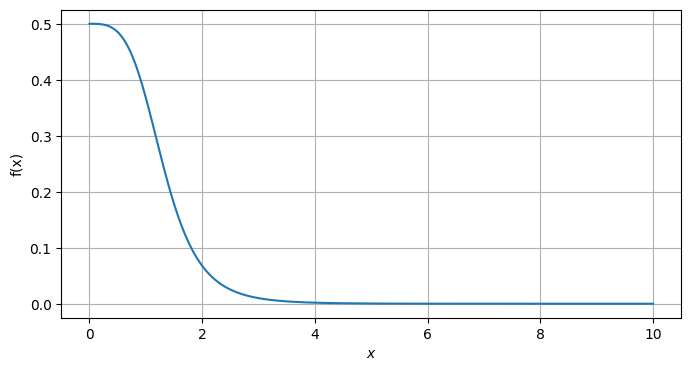

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,1000)

f = np.exp(-x)/(1+(x-1)**2)

plt.figure(figsize=(8,4), dpi=100)
plt.plot(x,f)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'f(x)')
plt.show()

<br>

여기서는 아래에 표현된 중간값 정리를 활용한다.

$$
  f_\text{mean} = \frac{1}{b-a}\int_a^b f(x)dx
$$

기본적인 아이디어는 적절한 구간 $a<x<b$에서 반복적으로 $x$를 랜덤 샘플링하여 함수 $f(x)$를 계산함으로써 평균값 $f_\text{mean}$을 추정하는 것이다. 그러면 적분값을 대략적으로 $(b-a)\hat{f}_\text{mean}$로 추정할 수 있다.

계산하려고 하는 정적분 구간이 $0<x<\infty$이며, 함수 $f(x)$의 값이 $x$가 커짐에 따라 급격히 감소하므로, $0<x<6$에 대해 샘플을 추출하고 평균값과 정적분을 추정해보자.

아래의 코드를 실행시키면, 다양한 크기의 샘플에 대해 적분값을 추정한 결과를 얻을 수 있다.

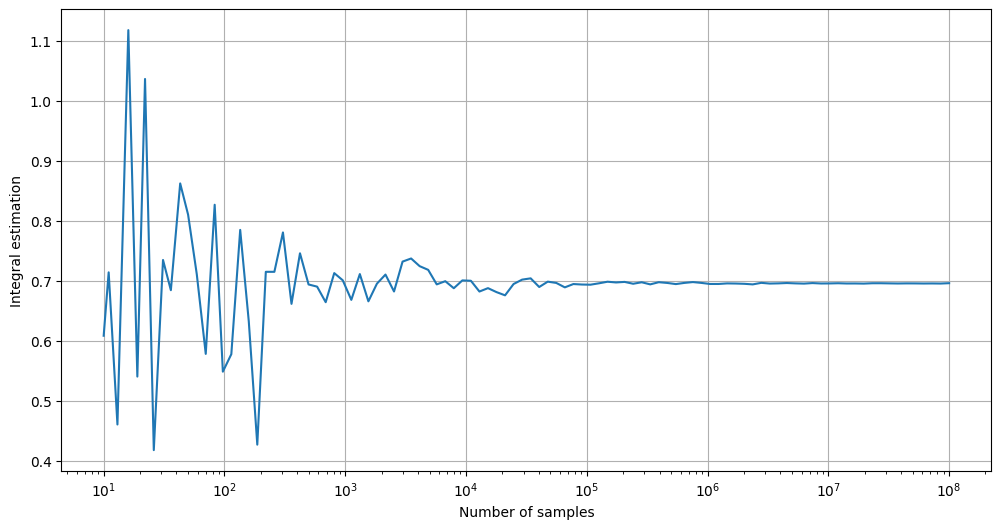

In [ ]:
y = 6
K = 100
m = np.logspace(1,8,K, dtype='int')
estim = np.zeros(K)

for k in range(K):
  xs = np.random.rand(m[k])*y
  estim[k] = np.mean(np.exp(-xs)/(1+(xs-1)**2))*y

plt.figure(figsize=(12,6), dpi=100)
plt.semilogx(m,estim)
plt.grid()
plt.xlabel('Number of samples')
plt.ylabel('Integral estimation')
plt.show()

<br>

보다 자세한 적분값을 아래 링크에서 확인할 수 있으며, 아래의 셀에서 몬테칼로 시뮬레이션 결과와 비교해볼 수 있다.

https://www.wolframalpha.com/input/?i=integral+of+0+to+inf+of+e%5E(-x)%2F(1%2B(x-1)%5E2)



In [ ]:
plt.figure(figsize=(12,6), dpi=100)
plt.semilogx(m,estim, label='Estimate')
plt.semilogx(m,0.6960918269*np.ones(K), ':', linewidth=2, label='Accurate')
plt.grid()
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Integral estimation')
plt.show()

<br>

## 원주율 $\pi$ 추정

같은 방법으로 원주율 $\pi$의 값을 추정해 보자.

2차원 공간상에서 원점을 중심으로 한 단위 원을 (unit circle) 생각해보자.


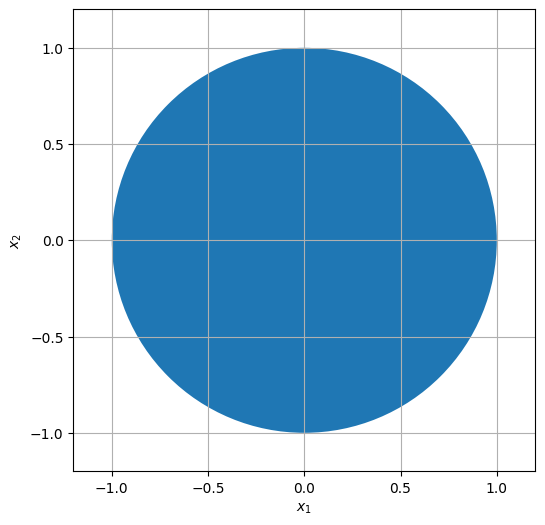

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=100)
plt.gcf().gca().add_artist(plt.Circle((0, 0), 1))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('square')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.grid()
plt.show()

<br>

아래와 같이 단위 원 내부를 표현하는 Indicator 함수를 정의한다.

$$
  f(x_1, x_2) =
  \begin{cases}
  1 &\quad \text{if } x_1^2 + x_2^2 \le 1\\
  0 &\quad \text{otherwise}
  \end{cases}
$$

2차원 상의 정사각형 구간 $-1\le x_1\le 1$, $-1\le x_2\le 1$에서 위의 함수를 적분하면, 단위 원 내부의 면적을 얻을 수 있을 것이다.

$$
\begin{aligned}
I &= \int_{-1}^1 \int_{-1}^1f(x_1,x_2)dx_1 dx_2 \\
  &= \pi
\end{aligned}
$$

또한, 아래와 같이 중간값 정리를 활용하면 다음을 얻을 수 있고,

$$
\begin{align*}
  f_\text{mean} &= \frac{1}{b_1-a_1}\frac{1}{b_2-a_2}\int_{a_2}^{b_2}\int_{a_1}^{b_1} f(x_1,x_2) dx_1 dx_2\\
  &= \frac{\pi}{4}
\end{align*}
$$

결과적으로 아래의 관계가 도출된다.

$$
  \pi = 4f_\text{mean}
$$


In [ ]:
def unit_circle_indicator(x):
  return np.floor(np.linalg.norm(x,axis=0)<1)

K = 100
m = np.logspace(1,8,K, dtype='int')
estim = np.zeros(K)

for k in range(K):
  xs = np.random.rand(2,m[k])*2 - 1
  estim[k] = np.mean(unit_circle_indicator(xs))*4

plt.figure(figsize=(12,6), dpi=100)
plt.semilogx(m,estim, label='Estimate')
plt.semilogx(m,np.pi*np.ones(K), ':', linewidth=2, label='Accurate')
plt.grid()
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel(r'$\pi$ estimate')
plt.show()

<br>

## The $n$-volume of an $n$-ball

기하학에서, 단위 구는 (unit sphere) 원점으로부터의 거리가 1인 모든 점들의 집합으로 정의된다. 예를 들어, 2차원 공간에서는 반경 1의 원으로 정의되며, 3차원 공간에서는 반경 1의 구로 정의된다.

이를 확장하여, $n$차원 공간상의 단위 구(초구, hypersphere)를 정의할 수 있다. $n$차원 공간 상의 단위 구 내부 부피($n$-volume)는 여러 수학 문제에서 나타나는데, 3차원 공간상의 단위 구의 부피를 일반화한 것으로 볼 수 있다.

몬테칼로 적분은 등간격의 샘플링을 통한 수치적분이 어려운, 지금 다루려고 하는 것과 같은 고차원 공간 문제에 특히 적합하다.
위에서와 마찬가지로 $n$차원 공간 상의 벡터 $x=(x_1,\dots,x_n)$에 대해, 단위 구 내부를 표현하는 Indicator 함수를 정의한다.

$$
  f(x) =
  \begin{cases}
  1 &\quad \text{if } \|x\|_2 \le 1\\
  0 &\quad \text{otherwise}
  \end{cases}
$$

구하려고 하는 $n$차원 단위 구 내부의 $n$-volume은 위의 함수를 모든 변수 $x_1,\dots,x_n$에 대해 $-1\le x_1 \le 1, \dots, -1\le x_n \le 1$에서 다중적분한 것으로 정의할 수 있다.

$$
\begin{aligned}
V_n &= \int_{-1}^1 \dots \int_{-1}^1f(x)dx_1 \dots dx_n
\end{aligned}
$$

그러면 다음의 중간값 정리를 통해,

$$
\begin{align*}
  f_\text{mean} &= \frac{1}{2^n}\int_{-1}^1 \dots \int_{-1}^1f(x)dx_1 \dots dx_n
\end{align*}
$$

랜덤 생플을 통해 추정한 평균값을 $\hat{f}_\text{mean}$라 하면, $n$차원 공간상의 단위 구 내부  $n$-volume은 아래와 같이 계산할 수 있다.

 $$
 V_n = 2^n \hat{f}_\text{mean}
 $$

예를 들어서, 아래의 코드는 6차원 공간 상의  단위 구 내부의 $n$-부피를 계산하는 예를 보여준다.

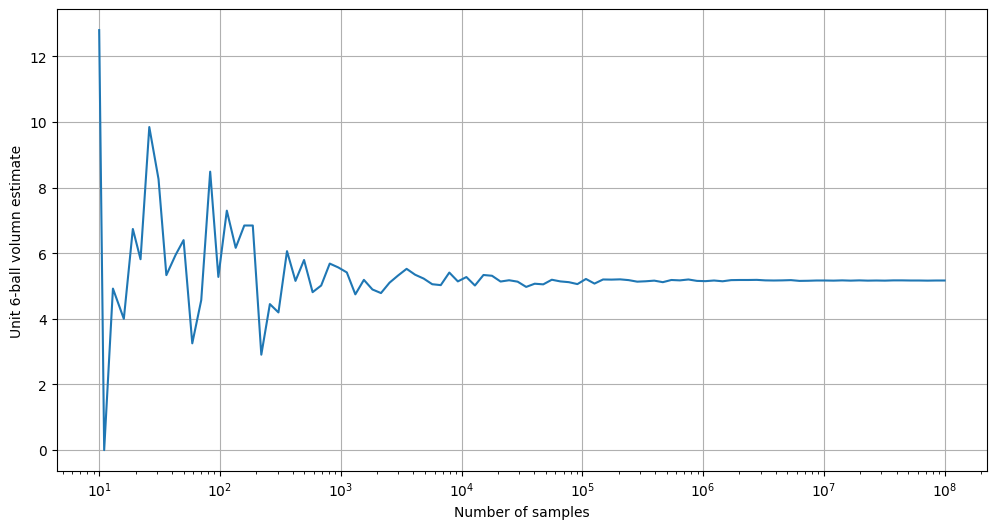

In [ ]:
def unit_ball_indicator(x):
  return np.floor(np.linalg.norm(x,axis=0)<1)

K = 100
m = np.logspace(1,8,K, dtype='int')
estim = np.zeros(K)

for k in range(K):
  xs = np.random.rand(6,m[k])*2 - 1
  estim[k] = np.mean(unit_ball_indicator(xs))*2**6

plt.figure(figsize=(12,6), dpi=100)
plt.semilogx(m,estim)
plt.grid()
plt.xlabel('Number of samples')
plt.ylabel(r'Unit 6-ball volumn estimate')
plt.show()

<br>

아래의 코드는 $n=0,\dots,16$에 대해, 각각 10,000,000개의 샘플을 통해 추정한 $n$-volume 추정 결과를 보여준다 .

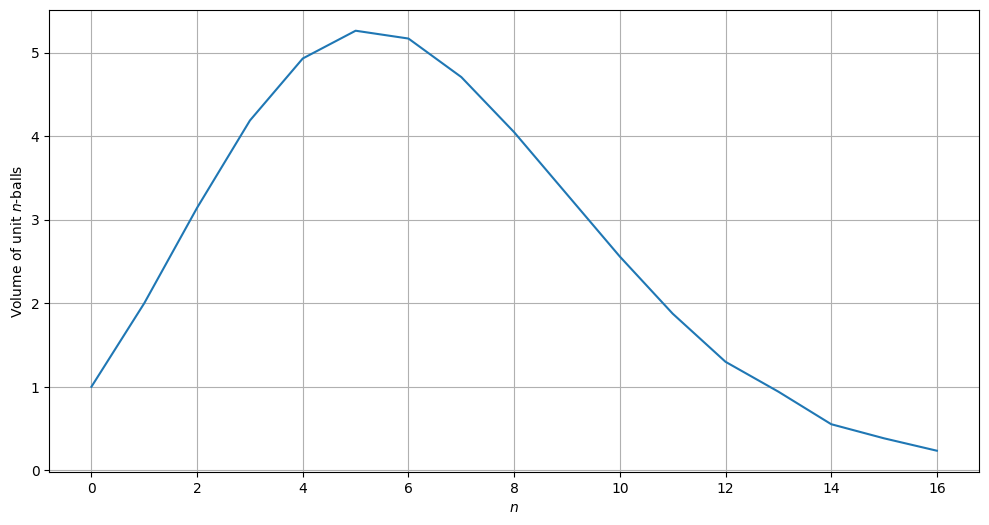

In [ ]:
m = 10000000
N = 17
n_list = np.arange(N, dtype='int')
estim = np.zeros(N)

for i in range(N):
  n = n_list[i]
  xs = np.random.rand(n,m)*2 - 1
  estim[i] = np.mean(unit_ball_indicator(xs))*(2**n)

plt.figure(figsize=(12,6), dpi=100)
plt.plot(n_list,estim)
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'Volume of unit $n$-balls')
plt.show()

<br>

아래 링크에서 정확한 값을 참고하여 비교할 수 있다.

https://en.wikipedia.org/wiki/Volume_of_an_n-ball



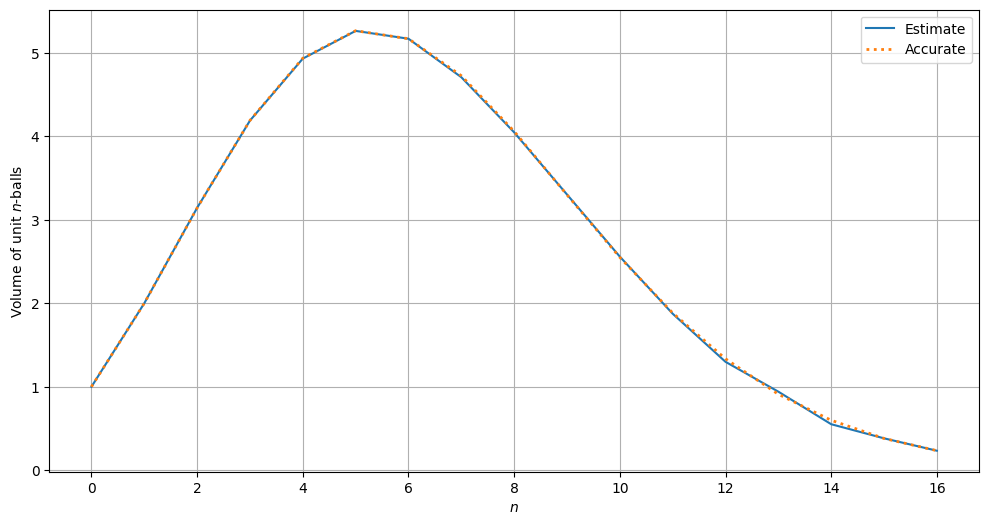

In [ ]:
from scipy.special import gamma
true_volume = np.pi**(n_list/2)/gamma(n_list/2+1)

plt.figure(figsize=(12,6), dpi=100)
plt.plot(n_list, estim, label='Estimate')
plt.plot(n_list, true_volume, ':', linewidth=2, label='Accurate')
plt.grid()
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel(r'Volume of unit $n$-balls')
plt.show()

---
<div style="text-align: right">
References:
  
1) https://en.wikipedia.org/wiki/Monte_Carlo_method
  
2) https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0
</div>


